In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("sales_data.xls")

In [4]:
df.shape

(578320, 12)

In [5]:
df.head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      578320 non-null  object
 1   device_id        578320 non-null  object
 2   item_id          578320 non-null  int64 
 3   line_item_id     578320 non-null  int64 
 4   order_id         578320 non-null  object
 5   event_id         578320 non-null  int64 
 6   event_timestamp  578320 non-null  object
 7   quantity         578320 non-null  int64 
 8   currency         578320 non-null  object
 9   checked_out_at   578320 non-null  object
 10  status           578320 non-null  object
 11  location         578320 non-null  object
dtypes: int64(4), object(8)
memory usage: 52.9+ MB


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,578320,4594,eb7dcb88-073d-403e-bdd4-1e5725fe2338,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_id,578320,4594,5d53495a-55ac-49bf-b876-ad1ac4b8d2a4,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_id,578320.0,NaN,NaN,NaN,7.995741,4.322902,1.0,4.0,8.0,12.0,15.0
line_item_id,578320.0,NaN,NaN,NaN,19034.44488,9153.541683,3201.0,11108.0,19067.0,26960.0,34941.0
order_id,578320,4594,5cc9c814-c69a-4831-9b50-92abe2c1dea2,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_id,578320.0,NaN,NaN,NaN,88235.379821,42541.874688,14786.0,51318.0,88373.0,125003.0,161960.0
event_timestamp,578320,70287,2024-03-30 04:03:10.636226,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,578320.0,NaN,NaN,NaN,3.009861,1.406914,1.0,2.0,3.0,4.0,5.0
currency,578320,3,USD,198037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
checked_out_at,578320,4594,2024-03-30 04:09:12.797464,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()

customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
location           0
dtype: int64

In [12]:
# converting datatypes

df["event_timestamp"] = pd.to_datetime(df["event_timestamp"])
df["quantity"] = pd.to_numeric(df["quantity"])

df

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
...,...,...,...,...,...,...,...,...,...,...,...,...
578315,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578316,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578317,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578318,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161960,2024-03-30 04:14:18.224200,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island


In [13]:
# for missing datas
df.fillna({
    "currency": "unknown",
    "status": "unknown",
    "location": "unknown"
}, inplace = True)

df

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
...,...,...,...,...,...,...,...,...,...,...,...,...
578315,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578316,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578317,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578318,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161960,2024-03-30 04:14:18.224200,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island


In [14]:
# dropping duplicates
df.drop_duplicates(inplace = True)

df

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
...,...,...,...,...,...,...,...,...,...,...,...,...
578315,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578316,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578317,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578318,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161960,2024-03-30 04:14:18.224200,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island


In [16]:
# extracting features
df["year"] = df["event_timestamp"].dt.year
df["month"] = df["event_timestamp"].dt.month 
df["day"] = df["event_timestamp"].dt.day
df["hour"] = df["event_timestamp"].dt.hour

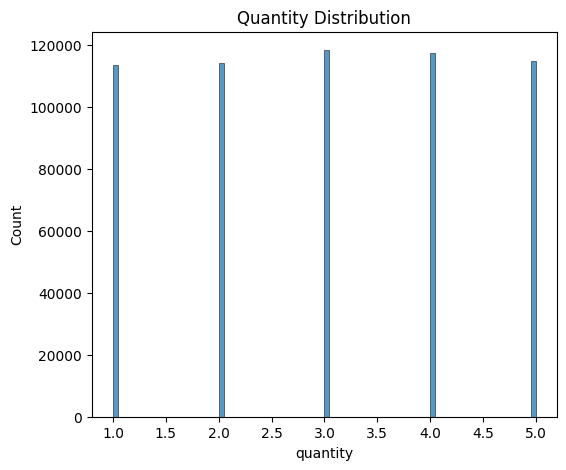

In [18]:
# plotting

plt.figure(figsize=(6, 5))
sns.histplot(df["quantity"])
plt.title("Quantity Distribution")
plt.show()

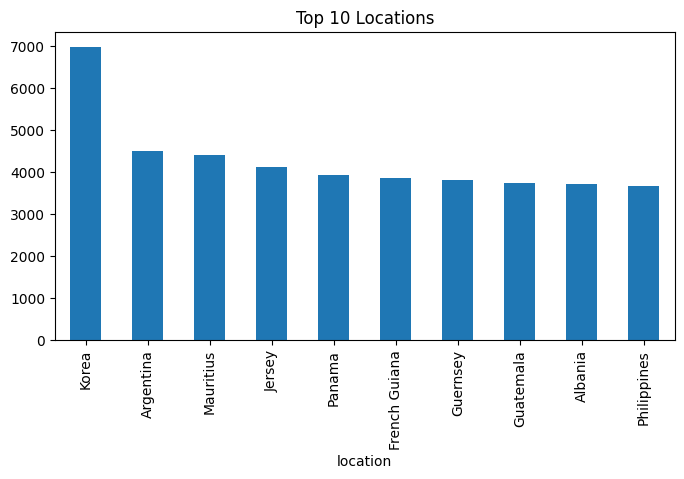

In [19]:
plt.figure(figsize=(8, 4))
df["location"].value_counts().head(10).plot(kind = "bar")
plt.title("Top 10 Locations")
plt.show()

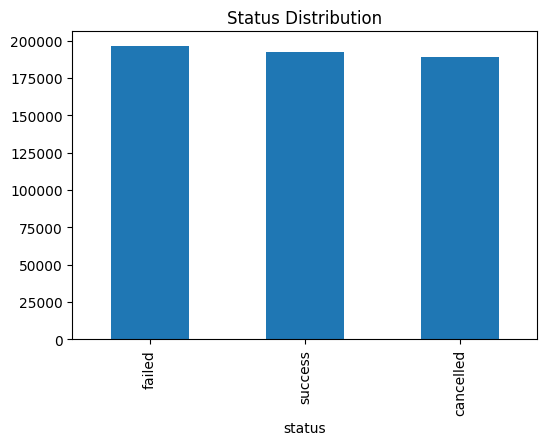

In [20]:
plt.figure(figsize=(6, 4))
df["status"].value_counts().plot(kind = "bar")
plt.title("Status Distribution")
plt.show()